## Alphabet Soup Charity Optimzation

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"], 1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Check for categorical data
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [5]:
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

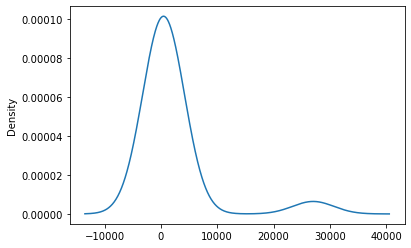

In [7]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

According to the density plot, the most common unique values have more than 500 instances within the dataset. Therefore, we can bucket any APPLICATION_TYPE that appears fewer than 500 times in the dataset as "other."

In [8]:
# Determine which values to replace if counts are less than 500
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_type_count = application_df.CLASSIFICATION.value_counts()
class_type_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1370        1
C2561        1
C1236        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

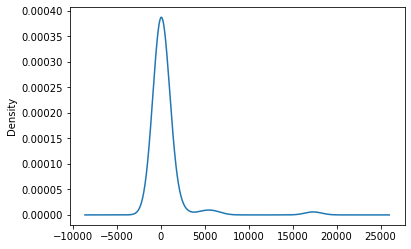

In [10]:
# Visualize the value counts of CLASSIFICATION
class_type_count.plot.density()

According to the density plot, the most common unique values have more than 1,700 instances within the dataset. Therefore, we can bucket any CLASSIFICATION that appears fewer than 1,700 times in the dataset as "other."

In [11]:
# Determine which values to replace if counts are less than 1,700
replace_class = list(class_type_count[class_type_count < 1700].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Attempt #1

### Activation function of  output layers is changed for optimization

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:54 - loss: 9.5308 - accuracy: 0.3750
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 7.4253 - accuracy: 0.5131  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 7.3490 - accuracy: 0.5181
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkp

556/804 [===================>..........] - ETA: 0s - loss: 7.1094 - accuracy: 0.5338
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 7.1096 - accuracy: 0.5338
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 7.1102 - accuracy: 0.5337
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01

302/804 [==========>...................] - ETA: 0s - loss: 7.1396 - accuracy: 0.5318
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 7.1342 - accuracy: 0.5322
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
362/804 [============>.................] - ETA: 0s - loss: 7.1301 - accuracy: 0.5324
Epoch 00002: saving model to checkpoints\weights.02

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 7.2782 - accuracy: 0.5227
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 7.2516 - accuracy: 0.5245
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 7.2307 - accuracy: 0

622/804 [======================>.......] - ETA: 0s - loss: 7.1333 - accuracy: 0.5322
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 7.1330 - accuracy: 0.5322
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 7.1332 - accuracy: 0.5322
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
385/804 [=============>................] - ETA: 0s - loss: 7.2177 - accuracy: 0.5267
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 7.2142 - accuracy: 0.5269
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving 

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 7.0390 - accuracy: 0.5384
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 7.0353 - accuracy: 0.5386
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving 

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 7.0967 - accuracy: 0.5346
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 7.0982 - accuracy: 0.5345
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving 

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 7.0738 - accuracy: 0.5361
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
479/804 [================>.............] - ETA: 0s - loss: 7.0771 - accuracy: 0.5359
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving 

Epoch 00007: saving model to checkpoints\weights.07.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 6.9655 - accuracy: 0.5432
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 6.9861 - accuracy: 0.5419
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 7.0016 - accuracy: 0.5409
Epoch 00007: saving model to checkpoints\weights.07.

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 7.1072 - accuracy: 0.5339
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 7.1085 - accuracy: 0.5338
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1097 - accurac

486/804 [=================>............] - ETA: 0s - loss: 7.1896 - accuracy: 0.5285
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 7.1890 - accuracy: 0.5286
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 7.1882 - accuracy: 0.5286
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08


Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 7.0193 - accuracy: 0.5397
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 7.0343 - accuracy: 0.5387
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.0857 - accuracy: 0.5353
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 7.1481 - accuracy: 0.5312
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 6.7305 - accuracy: 0.5586
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to check

Epoch 00010: saving model to checkpoints\weights.10.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 7.0516 - accuracy: 0.5376
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 7.0549 - accuracy: 0.5374
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 7.0577 - accuracy: 0.5372
Epoch 00010: saving model to checkpoints\weights.10.

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 7.2539 - accuracy: 0.5243
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 7.2482 - accuracy: 0.5247
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
361/804 [============>.................] - ETA: 0s - loss: 7.2438 - accuracy: 0

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 7.4053 - accuracy: 0.5144
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 7.3946 - accuracy: 0.5151
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 7.3837 - accuracy: 0

Epoch 00012: saving model to checkpoints\weights.12.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 7.2375 - accuracy: 0.5254
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 7.2348 - accuracy: 0.5256
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 7.2318 - accuracy: 0

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
373/804 [============>.................] - ETA: 0s - loss: 7.1286 - accuracy: 0.5325
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 7.1330 - accuracy: 0.5322
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
428/804 [============

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 7.0059 - accuracy: 0.5406
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 7.0097 - accuracy: 0.5403
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 7.0238 - accuracy: 0

669/804 [=======================>......] - ETA: 0s - loss: 7.1387 - accuracy: 0.5319
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 7.1381 - accuracy: 0.5319
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 7.1372 - accuracy: 0.5320
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 7.3081 - accuracy: 0.5208
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
462/804 [================>.............] - ETA: 0s - loss: 7.3011 - accuracy: 0.5212
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
485/804 [============

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 6.9175 - accuracy: 0.5464
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 6.9532 - accuracy: 0.5440
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 6.9813 - accuracy: 0

730/804 [==========================>...] - ETA: 0s - loss: 7.0934 - accuracy: 0.5348
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 7.0945 - accuracy: 0.5348
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
781/804 [============================>.] - ETA: 0s - loss: 7.0957 - accuracy: 0.5347
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16

Epoch 00017: saving model to checkpoints\weights.17.hdf5
480/804 [================>.............] - ETA: 0s - loss: 7.0422 - accuracy: 0.5382
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
507/804 [=================>............] - ETA: 0s - loss: 7.0455 - accuracy: 0.5380
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 7.0489 - accuracy: 0.5378
Epoch 00017: saving model to checkpoints\weights.17.

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 7.1920 - accuracy: 0.5284
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 7.1883 - accuracy: 0.5286
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving 

778/804 [============================>.] - ETA: 0s - loss: 7.1770 - accuracy: 0.5294
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1757 - accuracy: 0.5294
Epoch 19/100
  1/804 [..............................] - ETA: 0s - loss: 6.1950 - accuracy: 0.5938
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 7.1738 - accuracy: 0.5296
Epoch 0

529/804 [==================>...........] - ETA: 0s - loss: 7.1828 - accuracy: 0.5290
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 7.1813 - accuracy: 0.5291
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 7.1802 - accuracy: 0.5291
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19

280/804 [=========>....................] - ETA: 1s - loss: 7.1558 - accuracy: 0.5307
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
308/804 [==========>...................] - ETA: 0s - loss: 7.1606 - accuracy: 0.5304
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 7.1635 - accuracy: 0.5302
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20

 30/804 [>.............................] - ETA: 1s - loss: 6.7515 - accuracy: 0.5573
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 6.9222 - accuracy: 0.5461
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 6.9980 - accuracy: 0.5411
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21

589/804 [====================>.........] - ETA: 0s - loss: 7.1197 - accuracy: 0.5331
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 7.1211 - accuracy: 0.5330
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 7.1219 - accuracy: 0.5330
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
357/804 [============>.................] - ETA: 0s - loss: 7.1695 - accuracy: 0.5298
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
385/804 [=============>................] - ETA: 0s - loss: 7.1690 - accuracy: 0.5299
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving 

 83/804 [==>...........................] - ETA: 1s - loss: 6.8792 - accuracy: 0.5489
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 6.8610 - accuracy: 0.5501
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
143/804 [====>.........................] - ETA: 1s - loss: 6.8573 - accuracy: 0.5503
Epoch 00023: saving model to checkpoints\weights.23

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 6.9908 - accuracy: 0.5416
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 6.9957 - accuracy: 0.5412
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 7.0008 - accuracy: 0

Epoch 00024: saving model to checkpoints\weights.24.hdf5
394/804 [=============>................] - ETA: 0s - loss: 7.2096 - accuracy: 0.5272
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 7.2034 - accuracy: 0.5276
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 7.1971 - accuracy: 0.5280
Epoch 00024: saving model to checkpoints\weights.24.

Epoch 00025: saving model to checkpoints\weights.25.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 7.0434 - accuracy: 0.5381
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 7.0342 - accuracy: 0.5387
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 7.0333 - accuracy: 0.5388
Epoch 00025: saving model to checkpoints\weights.25.

700/804 [=========================>....] - ETA: 0s - loss: 7.1141 - accuracy: 0.5335
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 7.1160 - accuracy: 0.5334
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 7.1174 - accuracy: 0.5333
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25


Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
466/804 [================>.............] - ETA: 0s - loss: 7.0833 - accuracy: 0.5355
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
495/804 [=================>............] - ETA: 0s - loss: 7.0879 - accuracy: 0.5352
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
521/804 [===========

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 7.1635 - accuracy: 0.5302
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 7.1617 - accuracy: 0.5304
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
275/804 [=========>..

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
782/804 [============================>.] - ETA: 0s - loss: 7.1364 - accuracy: 0.5320
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1364 - accuracy: 0.5320
Epoch 28/100
  1/804 [..............................] - ETA: 0s - loss: 6.1950 - accuracy: 0.5938
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to check

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 7.1229 - accuracy: 0.5329
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 7.1221 - accuracy: 0.5330
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving 

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 7.1532 - accuracy: 0.5309
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
297/804 [==========>...................] - ETA: 0s - loss: 7.1500 - accuracy: 0.5311
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
324/804 [===========>

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 7.2152 - accuracy: 0.5269
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 7.1284 - accuracy: 0.5325
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving 


Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 7.1496 - accuracy: 0.5311
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 7.1491 - accuracy: 0.5312
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 7.1401 - accuracy: 0.5318
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
366/804 [============>.................] - ETA: 0s - loss: 7.1434 - accuracy: 0.5316
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
393/804 [============

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 7.1035 - accuracy: 0.5342
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 7.1166 - accuracy: 0.5333
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
137/804 [====>.......

Epoch 00032: saving model to checkpoints\weights.32.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 7.1356 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 7.1344 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 7.1333 - accuracy: 0.5322
Epoch 00032: saving model to checkpoints\weights.32.

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
383/804 [=============>................] - ETA: 0s - loss: 7.1798 - accuracy: 0.5292
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 7.1793 - accuracy: 0.5292
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
443/804 [============

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 7.0524 - accuracy: 0.5375
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 7.0378 - accuracy: 0.5385
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving 

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 7.0711 - accuracy: 0.5363
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 7.0736 - accuracy: 0.5361
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving 

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 7.1976 - accuracy: 0.5280
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
473/804 [================>.............] - ETA: 0s - loss: 7.1953 - accuracy: 0.5282
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
496/804 [=================>............] - ETA: 0s - loss: 7.1933 - accuracy: 0

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 7.2498 - accuracy: 0.5246
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 7.2522 - accuracy: 0.5244
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
249/804 [========>...

Epoch 00036: saving model to checkpoints\weights.36.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 7.2046 - accuracy: 0.5275
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 7.2020 - accuracy: 0.5277
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1995 - accuracy: 0.5279
Epoch 37/100
  1/804 [..........................

Epoch 00037: saving model to checkpoints\weights.37.hdf5
497/804 [=================>............] - ETA: 0s - loss: 7.1612 - accuracy: 0.5304
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 7.1590 - accuracy: 0.5305
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 7.1574 - accuracy: 0.5306
Epoch 00037: saving model to checkpoints\weights.37.

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 7.0968 - accuracy: 0.5346
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 7.0924 - accuracy: 0.5349
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
303/804 [==========>.

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1153 - accuracy: 0.5334
Epoch 39/100
  1/804 [..............................] - ETA: 0s - loss: 7.1481 - accuracy: 0.5312
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 7.4105 - accuracy: 0.5140
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to check

552/804 [===================>..........] - ETA: 0s - loss: 7.1284 - accuracy: 0.5325
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 7.1259 - accuracy: 0.5327
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 7.1248 - accuracy: 0.5328
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
310/804 [==========>...................] - ETA: 0s - loss: 7.1504 - accuracy: 0.5311
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 7.1524 - accuracy: 0.5310
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
369/804 [============

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 6.7886 - accuracy: 0.5548
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 6.8452 - accuracy: 0.5511
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
106/804 [==>...........................] - ETA: 1s - loss: 6.8788 - accuracy: 0

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 7.0434 - accuracy: 0.5381
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 7.0486 - accuracy: 0.5378
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving 

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
357/804 [============>.................] - ETA: 0s - loss: 7.2004 - accuracy: 0.5278
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
384/804 [=============>................] - ETA: 0s - loss: 7.1946 - accuracy: 0.5282
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving 

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 6.9756 - accuracy: 0.5426
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 6.9805 - accuracy: 0.5422
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving 

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 7.0857 - accuracy: 0.5353
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 7.0880 - accuracy: 0.5352
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving 

389/804 [=============>................] - ETA: 0s - loss: 7.0310 - accuracy: 0.5389
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 7.0324 - accuracy: 0.5388
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 7.0351 - accuracy: 0.5387
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44

138/804 [====>.........................] - ETA: 1s - loss: 7.2373 - accuracy: 0.5254
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 7.2262 - accuracy: 0.5261
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 7.2248 - accuracy: 0.5262
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45

690/804 [========================>.....] - ETA: 0s - loss: 7.1924 - accuracy: 0.5283
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 7.1903 - accuracy: 0.5285
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 7.1883 - accuracy: 0.5286
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 7.0937 - accuracy: 0.5348
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
474/804 [================>.............] - ETA: 0s - loss: 7.0946 - accuracy: 0.5348
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
501/804 [=================>............] - ETA: 0s - loss: 7.0950 - accuracy: 0

Epoch 00047: saving model to checkpoints\weights.47.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 7.1591 - accuracy: 0.5305
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 7.1775 - accuracy: 0.5293
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 7.1878 - accuracy: 0.5286
Epoch 00047: saving model to checkpoints\weights.47.

747/804 [==========================>...] - ETA: 0s - loss: 7.1833 - accuracy: 0.5289
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 7.1819 - accuracy: 0.5290
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1806 - accuracy: 0.5291
Epoch 48/100
  1/804 [..............................] - ETA: 0s - loss: 6.1950 - accuracy: 0.5938
Epoch 0

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 7.0951 - accuracy: 0.5347
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 7.0979 - accuracy: 0.5345
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
570/804 [============

Epoch 00049: saving model to checkpoints\weights.49.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 7.1422 - accuracy: 0.5316
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 7.1491 - accuracy: 0.5312
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 7.1558 - accuracy: 0.5307
Epoch 00049: saving model to checkpoints\weights.49.

Epoch 50/100
  1/804 [..............................] - ETA: 0s - loss: 10.0073 - accuracy: 0.3438
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 7.3530 - accuracy: 0.5178 
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 7.1812 - accuracy: 0.5291
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpo

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 7.0345 - accuracy: 0.5387
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 7.0385 - accuracy: 0.5384
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving 

Epoch 00051: saving model to checkpoints\weights.51.hdf5
311/804 [==========>...................] - ETA: 0s - loss: 7.1941 - accuracy: 0.5282
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 7.1917 - accuracy: 0.5284
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
366/804 [============>.................] - ETA: 0s - loss: 7.1892 - accuracy: 0.5286
Epoch 00051: saving model to checkpoints\weights.51.

 56/804 [=>............................] - ETA: 1s - loss: 7.3139 - accuracy: 0.5204
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 7.2503 - accuracy: 0.5245
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 7.2083 - accuracy: 0.5273
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52

612/804 [=====================>........] - ETA: 0s - loss: 7.1005 - accuracy: 0.5344
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 7.1019 - accuracy: 0.5343
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 7.1031 - accuracy: 0.5342
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
383/804 [=============>................] - ETA: 0s - loss: 7.1649 - accuracy: 0.5301
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 7.1611 - accuracy: 0.5304
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving 

Epoch 00054: saving model to checkpoints\weights.54.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 7.0721 - accuracy: 0.5362
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
144/804 [====>.........................] - ETA: 1s - loss: 7.0914 - accuracy: 0.5350
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 7.1220 - accuracy: 0

Epoch 00054: saving model to checkpoints\weights.54.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 7.1723 - accuracy: 0.5297
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 7.1709 - accuracy: 0.5298
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 7.1696 - accuracy: 0.5298
Epoch 00054: saving model to checkpoints\weights.54.

Epoch 00055: saving model to checkpoints\weights.55.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 7.1394 - accuracy: 0.5318
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 7.1376 - accuracy: 0.5319
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
478/804 [================>.............] - ETA: 0s - loss: 7.1351 - accuracy: 0.5321
Epoch 00055: saving model to checkpoints\weights.55.

161/804 [=====>........................] - ETA: 1s - loss: 7.1369 - accuracy: 0.5320
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 7.1492 - accuracy: 0.5312
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 7.1587 - accuracy: 0.5306
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56

720/804 [=========================>....] - ETA: 0s - loss: 7.1602 - accuracy: 0.5305
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 7.1596 - accuracy: 0.5305
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 7.1588 - accuracy: 0.5305
Epoch 00056: saving model to checkpoints\weights.56

Epoch 00057: saving model to checkpoints\weights.57.hdf5
467/804 [================>.............] - ETA: 0s - loss: 6.9200 - accuracy: 0.5462
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
492/804 [=================>............] - ETA: 0s - loss: 6.9289 - accuracy: 0.5456
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 6.9390 - accuracy: 0.5450
Epoch 00057: saving model to checkpoints\weights.57.

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 7.2256 - accuracy: 0.5262
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 7.2189 - accuracy: 0.5266
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
275/804 [=========>..

773/804 [===========================>..] - ETA: 0s - loss: 7.1913 - accuracy: 0.5284
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
800/804 [============================>.] - ETA: 0s - loss: 7.1895 - accuracy: 0.5285
Epoch 00058: saving model to checkpoints\weights.58.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1891 - accuracy: 0.5286
Epoch 59/100
  1/804 [..............................] - ETA: 1s - loss: 8.5777 - accuracy: 0.4375
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 27/804 

524/804 [==================>...........] - ETA: 0s - loss: 7.1234 - accuracy: 0.5329
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 7.1238 - accuracy: 0.5328
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 7.1240 - accuracy: 0.5328
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59

Epoch 00060: saving model to checkpoints\weights.60.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 7.2326 - accuracy: 0.5257
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
308/804 [==========>...................] - ETA: 0s - loss: 7.2290 - accuracy: 0.5259
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 7.2245 - accuracy: 0.5262
Epoch 00060: saving model to checkpoints\weights.60.

 28/804 [>.............................] - ETA: 1s - loss: 7.2448 - accuracy: 0.5249
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 7.1595 - accuracy: 0.5305
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 7.1319 - accuracy: 0.5323
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

581/804 [====================>.........] - ETA: 0s - loss: 7.1095 - accuracy: 0.5338
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 7.1103 - accuracy: 0.5337
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 7.1113 - accuracy: 0.5337
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

331/804 [===========>..................] - ETA: 0s - loss: 7.1177 - accuracy: 0.5332
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
357/804 [============>.................] - ETA: 0s - loss: 7.1145 - accuracy: 0.5335
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
382/804 [=============>................] - ETA: 0s - loss: 7.1127 - accuracy: 0.5336
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 6.8313 - accuracy: 0.5520
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 6.8820 - accuracy: 0.5487
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 6.9172 - accuracy: 0

Epoch 00063: saving model to checkpoints\weights.63.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 7.0811 - accuracy: 0.5356
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 7.0829 - accuracy: 0.5355
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 7.0849 - accuracy: 0.5354
Epoch 00063: saving model to checkpoints\weights.63.

Epoch 00064: saving model to checkpoints\weights.64.hdf5
384/804 [=============>................] - ETA: 0s - loss: 7.1354 - accuracy: 0.5321
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 7.1359 - accuracy: 0.5320
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 7.1355 - accuracy: 0.5321
Epoch 00064: saving model to checkpoints\weights.64.

Epoch 00065: saving model to checkpoints\weights.65.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 7.3893 - accuracy: 0.5154
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 7.3736 - accuracy: 0.5165
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 7.3674 - accuracy: 0.5169
Epoch 00065: saving model to checkpoints\weights.65.

Epoch 00065: saving model to checkpoints\weights.65.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 7.2494 - accuracy: 0.5246
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 7.2444 - accuracy: 0.5249
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 7.2406 - accuracy: 0.5252
Epoch 00065: saving model to checkpoints\weights.65.

445/804 [===============>..............] - ETA: 0s - loss: 7.1709 - accuracy: 0.5298
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
471/804 [================>.............] - ETA: 0s - loss: 7.1716 - accuracy: 0.5297
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
501/804 [=================>............] - ETA: 0s - loss: 7.1721 - accuracy: 0.5297
Epoch 00066: saving model to checkpoints\weights.66

192/804 [======>.......................] - ETA: 1s - loss: 7.3793 - accuracy: 0.5161
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 7.3567 - accuracy: 0.5176
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 7.3410 - accuracy: 0.5186
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 7.2128 - accuracy: 0.5270
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
797/804 [============================>.] - ETA: 0s - loss: 7.2100 - accuracy: 0.5272
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.2092 - accuracy: 0.5272
Epoch 68/100
  1/804 [..............................] - ETA: 0s - loss: 5.2419 - accuracy: 0.6562
Epoch 00

497/804 [=================>............] - ETA: 0s - loss: 7.1174 - accuracy: 0.5333
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 7.1178 - accuracy: 0.5332
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 7.1185 - accuracy: 0.5332
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 7.1878 - accuracy: 0.5286
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 7.1786 - accuracy: 0.5292
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving 


Epoch 00069: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1428 - accuracy: 0.5316
Epoch 70/100
  1/804 [..............................] - ETA: 0s - loss: 7.6246 - accuracy: 0.5000
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 7.3924 - accuracy: 0.5152
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 55/804 [=>.......................

548/804 [===================>..........] - ETA: 0s - loss: 7.1759 - accuracy: 0.5294
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 7.1722 - accuracy: 0.5297
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 7.1697 - accuracy: 0.5298
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
311/804 [==========>...................] - ETA: 0s - loss: 7.1296 - accuracy: 0.5325
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
338/804 [===========>..................] - ETA: 0s - loss: 7.1269 - accuracy: 0.5326
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving 

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
 54/804 [=>............................] - ETA: 1s - loss: 6.8662 - accuracy: 0.5497
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 6.9032 - accuracy: 0.5473
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving 

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 7.0837 - accuracy: 0.5355
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 7.0873 - accuracy: 0.5352
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
662/804 [============

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
362/804 [============>.................] - ETA: 0s - loss: 7.2652 - accuracy: 0.5236
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
388/804 [=============>................] - ETA: 0s - loss: 7.2565 - accuracy: 0.5241
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving 

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 7.1661 - accuracy: 0.5301
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 7.1630 - accuracy: 0.5303
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
164/804 [=====>......

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 7.1162 - accuracy: 0.5333
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 7.1159 - accuracy: 0.5334
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 7.1158 - accuracy: 0

410/804 [==============>...............] - ETA: 0s - loss: 7.1734 - accuracy: 0.5296
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 7.1732 - accuracy: 0.5296
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
465/804 [================>.............] - ETA: 0s - loss: 7.1740 - accuracy: 0.5296
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 7.0918 - accuracy: 0.5349
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 7.0822 - accuracy: 0.5356
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 7.0790 - accuracy: 0

716/804 [=========================>....] - ETA: 0s - loss: 7.1059 - accuracy: 0.5340
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 7.1063 - accuracy: 0.5340
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 7.1070 - accuracy: 0.5339
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

467/804 [================>.............] - ETA: 0s - loss: 7.1538 - accuracy: 0.5309
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
497/804 [=================>............] - ETA: 0s - loss: 7.1513 - accuracy: 0.5310
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 7.1493 - accuracy: 0.5312
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77


Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 7.0900 - accuracy: 0.5351
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 7.0771 - accuracy: 0.5359
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
283/804 [=========>.

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
788/804 [============================>.] - ETA: 0s - loss: 7.0793 - accuracy: 0.5358
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.0805 - accuracy: 0.5357
Epoch 79/100
  1/804 [..............................] - ETA: 0s - loss: 6.6715 - accuracy: 0.5625
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 21/804 [..............................] - ETA: 1s - loss: 6.8240 - accuracy: 0.5525
Epoch 00

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 7.0698 - accuracy: 0.5364
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 7.0723 - accuracy: 0.5362
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
578/804 [============

250/804 [========>.....................] - ETA: 1s - loss: 7.1052 - accuracy: 0.5341
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 7.1009 - accuracy: 0.5343
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 7.0976 - accuracy: 0.5346
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80

Epoch 81/100
  1/804 [..............................] - ETA: 0s - loss: 8.1012 - accuracy: 0.4688
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 7.3994 - accuracy: 0.5148
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 7.2963 - accuracy: 0.5215
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoin

556/804 [===================>..........] - ETA: 0s - loss: 7.1341 - accuracy: 0.5322
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 7.1328 - accuracy: 0.5323
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 7.1315 - accuracy: 0.5323
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81

302/804 [==========>...................] - ETA: 0s - loss: 6.9657 - accuracy: 0.5432
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
330/804 [===========>..................] - ETA: 0s - loss: 6.9686 - accuracy: 0.5430
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
357/804 [============>.................] - ETA: 0s - loss: 6.9699 - accuracy: 0.5429
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 54/804 [=>............................] - ETA: 1s - loss: 7.0110 - accuracy: 0.5402
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 7.0869 - accuracy: 0.5353
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 7.1290 - accuracy: 0

Epoch 00083: saving model to checkpoints\weights.83.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 7.1649 - accuracy: 0.5301
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 7.1634 - accuracy: 0.5302
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 7.1621 - accuracy: 0

355/804 [============>.................] - ETA: 0s - loss: 7.1454 - accuracy: 0.5314
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
383/804 [=============>................] - ETA: 0s - loss: 7.1466 - accuracy: 0.5313
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 7.1481 - accuracy: 0.5312
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

109/804 [===>..........................] - ETA: 1s - loss: 6.9810 - accuracy: 0.5422
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 6.9441 - accuracy: 0.5446
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 6.9272 - accuracy: 0.5457
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85

665/804 [=======================>......] - ETA: 0s - loss: 7.0133 - accuracy: 0.5401
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 7.0170 - accuracy: 0.5398
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 7.0209 - accuracy: 0.5396
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85

405/804 [==============>...............] - ETA: 0s - loss: 7.0916 - accuracy: 0.5350
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 7.0915 - accuracy: 0.5350
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
456/804 [================>.............] - ETA: 0s - loss: 7.0915 - accuracy: 0.5350
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 7.0219 - accuracy: 0.5395
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 7.0199 - accuracy: 0.5397
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving 

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 7.0951 - accuracy: 0.5347
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 7.0970 - accuracy: 0.5346
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
778/804 [============================>.] - ETA: 0s - loss: 7.0987 - accuracy: 0

Epoch 00088: saving model to checkpoints\weights.88.hdf5
468/804 [================>.............] - ETA: 0s - loss: 7.1623 - accuracy: 0.5303
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
498/804 [=================>............] - ETA: 0s - loss: 7.1636 - accuracy: 0.5302
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 7.1653 - accuracy: 0.5301
Epoch 00088: saving model to checkpoints\weights.88.

Epoch 00089: saving model to checkpoints\weights.89.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 7.2891 - accuracy: 0.5220
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 7.2858 - accuracy: 0.5222
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 7.2793 - accuracy: 0.5226
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.

774/804 [===========================>..] - ETA: 0s - loss: 7.1879 - accuracy: 0.5286
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1857 - accuracy: 0.5288
Epoch 90/100
  1/804 [..............................] - ETA: 0s - loss: 8.1012 - accuracy: 0.4688
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
 30/804 [>........................

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 7.1500 - accuracy: 0.5311
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 7.1465 - accuracy: 0.5314
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 7.1441 - accuracy: 0

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 7.1094 - accuracy: 0.5338
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
309/804 [==========>...................] - ETA: 0s - loss: 7.1130 - accuracy: 0.5336
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 7.1180 - accuracy: 0

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 6.9774 - accuracy: 0.5424
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 7.0506 - accuracy: 0.5376
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 7.0719 - accuracy: 0

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 7.1355 - accuracy: 0.5321
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 7.1339 - accuracy: 0.5322
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving 

333/804 [===========>..................] - ETA: 0s - loss: 7.2643 - accuracy: 0.5236
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
360/804 [============>.................] - ETA: 0s - loss: 7.2613 - accuracy: 0.5238
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
383/804 [=============>................] - ETA: 0s - loss: 7.2594 - accuracy: 0.5240
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 7.3320 - accuracy: 0.5192
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 7.3155 - accuracy: 0.5203
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 7.3025 - accuracy: 0

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 7.2027 - accuracy: 0.5277
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 7.2005 - accuracy: 0.5278
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
709/804 [============

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 7.1687 - accuracy: 0.5299
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 7.1649 - accuracy: 0.5301
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving 

Epoch 00096: saving model to checkpoints\weights.96.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 7.1279 - accuracy: 0.5326
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 7.1115 - accuracy: 0.5337
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 7.0925 - accuracy: 0.5349
Epoch 00096: saving model to checkpoints\weights.96.

686/804 [========================>.....] - ETA: 0s - loss: 7.0626 - accuracy: 0.5369
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 7.0645 - accuracy: 0.5367
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 7.0661 - accuracy: 0.5366
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 7.1323 - accuracy: 0.5323
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
472/804 [================>.............] - ETA: 0s - loss: 7.1338 - accuracy: 0.5322
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
498/804 [============

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 6.9999 - accuracy: 0.5410
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 7.0105 - accuracy: 0.5403
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving 

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 7.1039 - accuracy: 0.5341
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 7.1048 - accuracy: 0.5341
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1057 - accurac

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
498/804 [=================>............] - ETA: 0s - loss: 7.2166 - accuracy: 0.5268
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 7.2130 - accuracy: 0.5270
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
554/804 [============

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 7.1481 - accuracy: 0.5312
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 7.1447 - accuracy: 0.5315
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
790/804 [============================>.] - ETA: 0s - loss: 7.1252 - accuracy: 0.5328
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.1254 - accuracy: 0.5327


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0060 - accuracy: 0.5399
Loss: 1.0060473680496216, Accuracy: 0.539941668510437


In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimized_1.h5")

## Attempt # 2

### Additional hidden layers are added and Additional neurons are added to hidden layers


In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  25
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                1100      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,525
Trainable params: 1,525
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 3:29 - loss: 1071.7802 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 7632.5415 - accuracy: 0.4522  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 8435.1922 - accuracy: 0.4548
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model 

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 2830.2373 - accuracy: 0.4974
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 2745.2879 - accuracy: 0.4984
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
606/804 [======

272/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5392
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5444
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5424
Epoch 00003: saving model to checkpoints\weights.03.


Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5285
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 00003: saving model to checkpoints\weights.03

299/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04


Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6884 - accuracy: 0.5540
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5482
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5457
Epoch 00005: saving model to checkpoints\weights.05

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
650/804 [============


Epoch 00006: saving model to checkpoints\weights.06.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
371/804 [============>.................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5371
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5442
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 94/804 [==>...........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5451
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6896 - accuracy: 0

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
373/804 [============>.................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints\weights.08.

 74/804 [=>............................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5237
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5269
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5282
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09

Epoch 00009: saving model to checkpoints\weights.09.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.

350/804 [============>.................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5276
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5276
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5277
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5396
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5371
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6906 - accuracy: 


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 

372/804 [============>.................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
123/804 [===>..........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5422
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5408
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving 

648/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
449/804 [============

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5278
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0


Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15

401/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00017: saving model to checkpoints\weights.17.

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5356
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0


Epoch 00019: saving model to checkpoints\weights.19.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00019: saving model to checkpoints\weights.19.

425/804 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20


Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5248
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5250
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 


Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00021: saving model to checkpoints\weights.21

447/804 [===============>..............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5356
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6940 - accuracy: 0.5095
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5109
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving 

723/804 [=========================>....] - ETA: 0s - loss: 0.6923 - accuracy: 0.5228
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6923 - accuracy: 0.5230
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6922 - accuracy: 0.5233
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
525/804 [============

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00025: saving model to checkpoints\weights.25.


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00025: saving model to checkpoints\weights.25

476/804 [================>.............] - ETA: 0s - loss: 0.6923 - accuracy: 0.5223
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6922 - accuracy: 0.5229
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5233
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5429
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5423
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5417
Epoch 00027: saving model to checkpoints\weights.27.


Epoch 00027: saving model to checkpoints\weights.27.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 00027: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5360
Epoch 28/100
  1/804 [..............................] - ETA: 0s - loss: 0.6794 - accuracy: 0.6250
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 0

498/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00029: saving model to checkpoints\weights.29.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5355
Epoch 30/100
  1/804 [..............................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5938
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5507
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5367
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00030: saving model to checkpoints\weights.30.

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 00031: saving model to checkpoints\weights.31.

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5295
Epoch 32/100
  1/804 [..............................] - ETA: 0s - loss: 0.6784 - accuracy: 0.6250
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 47/804 [>.........................


Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6923 - accuracy: 0.5229
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6922 - accuracy: 0.5231
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6922 - accuracy: 0.5232
Epoch 00032: saving model to checkpoints\weights.32


Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00033: saving model to checkpoints\weights.33

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.6957 - accuracy: 0.4973
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5118
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 74/804 [=>..........

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
624/804 [============

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
327/804 [===========>..................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.6906 - accuracy: 0

 27/804 [>.............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 52/804 [>.............................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5220
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 76/804 [=>............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5197
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36

Epoch 00036: saving model to checkpoints\weights.36.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.


Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
322/804 [===========>..................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5188
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.6926 - accuracy: 0.5195
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
373/804 [============>.................] - ETA: 0s - loss: 0.6925 - accuracy: 

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00038: saving model to checkpoints\weights.38.


Epoch 00038: saving model to checkpoints\weights.38.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38


Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5226
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5231
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6922 - accuracy: 

 78/804 [=>............................] - ETA: 1s - loss: 0.6877 - accuracy: 0.5569
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6879 - accuracy: 0.5554
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6881 - accuracy: 0.5537
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40

Epoch 00040: saving model to checkpoints\weights.40.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6899 - accuracy: 0.5406
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6900 - accuracy: 0.5404
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6900 - accuracy: 0.5401
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.

351/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
376/804 [=============>................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5324
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41


Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6914 - accuracy: 

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
697/804 [============

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
373/804 [============>.................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5251
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
124/804 [===>..........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5254
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5248
Epoch 00044: saving model to checkpoints\weights.44.


Epoch 00044: saving model to checkpoints\weights.44.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44

Epoch 00045: saving model to checkpoints\weights.45.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.6896 - accuracy: 0.5428
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5423
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.6898 - accuracy: 0.5417
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.

101/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5360
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
128/804 [===>..........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46

642/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46

372/804 [============>.................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
123/804 [===>..........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving 

648/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5348
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 00050: saving model to checkpoints\weights.50.

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.

Epoch 00051: saving model to checkpoints\weights.51.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5200
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5217
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving 

672/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6925 - accuracy: 0.5211
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6925 - accuracy: 0.5216
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
473/804 [============


Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54

Epoch 00054: saving model to checkpoints\weights.54.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.

Epoch 00055: saving model to checkpoints\weights.55.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.

151/804 [====>.........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5225
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5231
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56

Epoch 00056: saving model to checkpoints\weights.56.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5276
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5279
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
498/804 [============

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
773/804 [============

439/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59

Epoch 00060: saving model to checkpoints\weights.60.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5248
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5253
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5256
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.

Epoch 00060: saving model to checkpoints\weights.60.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.

451/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5445
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5432
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5421
Epoch 00062: saving model to checkpoints\weights.62.

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5245
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5248
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5251
Epoch 00063: saving model to checkpoints\weights.63.

Epoch 00064: saving model to checkpoints\weights.64.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00064: saving model to checkpoints\weights.64.

475/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65


Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 


Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00066: saving model to checkpoints\weights.66.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5325
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5000
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 0

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving 

774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5329
Epoch 69/100
  1/804 [..............................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5938
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
 28/804 


Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 

Epoch 00070: saving model to checkpoints\weights.70.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5396
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5393
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.


Epoch 00070: saving model to checkpoints\weights.70.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5358
Epoch 71/100
  1/804 [..............................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 26/804 [..............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5293
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 0

526/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00072: saving model to checkpoints\weights.72.

Epoch 73/100
  1/804 [..............................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5625
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoin

543/804 [===================>..........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5364
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5363
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

274/804 [=========>....................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5436
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5430
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.6898 - accuracy: 0.5424
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74


Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6930 - accuracy: 0.5173
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5209
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 75/804 [=>.........

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
625/804 [============


Epoch 00076: saving model to checkpoints\weights.76.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
326/804 [===========>..................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5199
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5216
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6923 - accuracy: 0

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
648/804 [============

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5171
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5180
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
378/804 [=============>................] - ETA: 0s - loss: 0.6928 - accuracy: 0

 50/804 [>.............................] - ETA: 1s - loss: 0.6854 - accuracy: 0.5746
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 0.6870 - accuracy: 0.5626
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 0.6878 - accuracy: 0.5566
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79

Epoch 00079: saving model to checkpoints\weights.79.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5389
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6902 - accuracy: 0.5387
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6903 - accuracy: 0.5386
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.


Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5396
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
378/804 [=============>................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5395
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.6902 - accuracy: 0.5394
Epoch 00080: saving model to checkpoints\weights.80

 81/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5390
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5388
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5394
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
128/804 [===>..........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5385
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 00083: saving model to checkpoints\weights.83.

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0

374/804 [============>.................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5271
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5272
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5273
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
175/804 [=====>......

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
727/804 [============

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00086: saving model to checkpoints\weights.86.

Epoch 00087: saving model to checkpoints\weights.87.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5397
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5377
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.

Epoch 00087: saving model to checkpoints\weights.87.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.

398/804 [=============>................] - ETA: 0s - loss: 0.6893 - accuracy: 0.5461
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6894 - accuracy: 0.5455
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6894 - accuracy: 0.5450
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
199/804 [======>.....

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
751/804 [============

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5302
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00090: saving model to checkpoints\weights.90.

Epoch 00091: saving model to checkpoints\weights.91.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5483
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5473
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5459
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.


Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5379
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6904 - accuracy: 0.5377
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6904 - accuracy: 0.5375
Epoch 00091: saving model to checkpoints\weights.91

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 0.6896 - accuracy: 0.5437
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6897 - accuracy: 0.5433
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
503/804 [============

173/804 [=====>........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
793/804 [============

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5269
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5270
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5269
Epoch 00094: saving model to checkpoints\weights.94.

205/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5309
Epoch 96/100
  1/804 [..............................] - ETA: 0s - loss: 0.6870 - accuracy: 0.5625
Epoch 00

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
554/804 [============

227/804 [=======>......................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5229
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5232
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97


Epoch 00097: saving model to checkpoints\weights.97.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.5268
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6918 - accuracy: 0.5270
Epoch 98/100
  1/804 [..............................] - ETA: 0s - loss: 0.6958 - accuracy: 0.5000
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6889 - accuracy: 0.5473
Epoch 0

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5386
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5385
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6902 - accuracy: 0

254/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99

804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5329
Epoch 100/100
  1/804 [..............................] - ETA: 0s - loss: 0.6952 - accuracy: 0.5000
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6934 - accuracy: 0.5138
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5245
Epoch 00100: saving model to checkpoints\weights.100.h

535/804 [==================>...........] - ETA: 0s - loss: 0.6901 - accuracy: 0.5394
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5392
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5390
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoint

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7010 - accuracy: 0.5454
Loss: 0.7010110020637512, Accuracy: 0.5454227328300476


In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimized_2.h5")

## Attempt #3

### Noisy variables are removed from features

In [29]:
#  Import and read the charity_data.csv.
application_df2 = pd.read_csv("Resources/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df2 = application_df2.drop(["EIN","NAME","SPECIAL_CONSIDERATIONS", "STATUS"], 1)

# Generate our categorical variable list
application_cat2 = application_df2.dtypes[application_df2.dtypes == "object"].index.tolist()

# Determine the number of unique values in each column.
application_df2[application_cat2].nunique()

# Determine which values to replace if counts are less than 
replace_application2 = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application2:
    application_df2.APPLICATION_TYPE = application_df2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df2.APPLICATION_TYPE.value_counts()

# Look at CLASSIFICATION value counts for binning
class_type_count = application_df2.CLASSIFICATION.value_counts()

# Determine which values to replace if counts are less than 
replace_class2 = list(class_type_count[class_type_count < 1700].index)

# Replace in dataframe
for cls in replace_class2:
    application_df2.CLASSIFICATION = application_df2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df2.CLASSIFICATION.value_counts()

# Generate our categorical variable lists
application_df2[application_cat2].nunique()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df2 = pd.DataFrame(enc.fit_transform(application_df2[application_cat2]))

# Add the encoded variable names to the dataframe
encode_df2.columns = enc.get_feature_names(application_cat2)
encode_df2.head()

# Merge one-hot encoded features and drop the originals
application_df2 = application_df2.merge(encode_df,left_index=True, right_index=True)
application_df2 = application_df2.drop(application_cat2,1)
application_df2.head()

# Split our preprocessed data into our features and target arrays
y = application_df2["IS_SUCCESSFUL"].values
X = application_df2.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                516       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 3:21 - loss: 7277.8076 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 1s - loss: 44607.5277 - accuracy: 0.5117 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 52417.9158 - accuracy: 0.5213
Epoch 00001: saving model

560/804 [===================>..........] - ETA: 0s - loss: 29907.2470 - accuracy: 0.5196
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 29150.3785 - accuracy: 0.5190
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 28384.0285 - accuracy: 0.5184
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoint

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 902.4421 - accuracy: 0.4948
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 1004.7539 - accuracy: 0.4956
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
369/804 [============>.................] - ETA: 0s - loss: 1082.5827 - acc

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 1445.7443 - accuracy: 0.4719
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 86/804 [==>...........................] - ETA: 1s - loss: 1933.6918 - accuracy: 0.4741
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
113/804 [===>..


Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 11930.5577 - accuracy: 0.5081
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 11951.8721 - accuracy: 0.5082
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 11956.0136 

Epoch 00004: saving model to checkpoints\weights.04.hdf5
357/804 [============>.................] - ETA: 0s - loss: 10159.6061 - accuracy: 0.5126
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
384/804 [=============>................] - ETA: 0s - loss: 10182.5159 - accuracy: 0.5119
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 10150.5048 -

 88/804 [==>...........................] - ETA: 1s - loss: 186.1675 - accuracy: 0.5103
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 219.2971 - accuracy: 0.5122
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 282.2316 - accuracy: 0.5115
Epoch 00005: saving model to checkpoints\weig

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 2559.9644 - accuracy: 0.5064
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 2540.6104 - accuracy: 0.5071
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
715/804 [======

397/804 [=============>................] - ETA: 0s - loss: 5916.5656 - accuracy: 0.4966
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 6189.7128 - accuracy: 0.4974
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 6379.2506 - accuracy: 0.4982
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\w

Epoch 00007: saving model to checkpoints\weights.07.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 11764.6419 - accuracy: 0.4665
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 11538.2399 - accuracy: 0.4676
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 11456.9012 - accuracy: 0.4701
Epoch 00007: saving model to checkpoints

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 8782.5659 - accuracy: 0.4978
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8632.9608 - accuracy: 0.4983
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 8502.4066 - ac

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
463/804 [================>.............] - ETA: 0s - loss: 777.3600 - accuracy: 0.5400
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
493/804 [=================>............] - ETA: 0s - loss: 782.5482 - accuracy: 0.5392
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: sav

Epoch 00009: saving model to checkpoints\weights.09.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 1081.4369 - accuracy: 0.5717
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 1500.0861 - accuracy: 0.5700
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 2430.0083 - ac

Epoch 00009: saving model to checkpoints\weights.09.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 4781.0977 - accuracy: 0.5562
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
783/804 [============================>.] - ETA: 0s - loss: 4745.3912 - accuracy: 0.5561
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 4717.6650 - accuracy: 0.5560
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 9.2235 - accuracy: 0.5312


Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
505/804 [=================>............] - ETA: 0s - loss: 967.5845 - accuracy: 0.5109
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 1108.6321 - accuracy: 0.5108
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 1227.8672 - accuracy: 0.5106
Epoch 00010: saving model to checkpoints\we

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 143.4779 - accuracy: 0.4956
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 142.8757 - accuracy: 0.4972
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
311/804 [========

Epoch 00011: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 3391.9482 - accuracy: 0.5063
Epoch 12/100
  1/804 [..............................] - ETA: 0s - loss: 1356.0970 - accuracy: 0.3750
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 1023.2469 - accuracy: 0.4385
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 6216.7372 - accuracy: 0.4724
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 6216.5233 - accuracy: 0.4733
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: s

288/804 [=========>....................] - ETA: 0s - loss: 256.1577 - accuracy: 0.5114
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 256.1833 - accuracy: 0.5113
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 255.4959 - accuracy: 0.5115
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weig

 29/804 [>.............................] - ETA: 1s - loss: 142.0518 - accuracy: 0.4646
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 486.5891 - accuracy: 0.4619
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 591.8636 - accuracy: 0.4614
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weig

Epoch 00014: saving model to checkpoints\weights.14.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 1856.2941 - accuracy: 0.4961
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 1912.4576 - accuracy: 0.4966
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 1956.5002 - accuracy: 0.4971
Epoch 00014: saving model to checkpoints\we

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 1607.3444 - accuracy: 0.5393
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
360/804 [============>.................] - ETA: 0s - loss: 1639.0205 - accuracy: 0.5370
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
380/804 [=============>................] - ETA: 0s - loss: 1665.0010 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\we

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 86/804 [==>...........................] - ETA: 1s - loss: 0.7609 - accuracy: 0.5048
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.7585 - accuracy: 0.5073
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.7560 - accuracy: 0.5099
Epoch 00016: saving model to checkpoints\weights.16.

641/804 [======================>.......] - ETA: 0s - loss: 0.7402 - accuracy: 0.5215
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.7395 - accuracy: 0.5219
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.7389 - accuracy: 0.5223
Epoch 00016: saving model to checkpoints\weights.16

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.7060 - accuracy: 0.5286
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.7058 - accuracy: 0.5287
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving 

Epoch 00018: saving model to checkpoints\weights.18.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.6971 - accuracy: 0.5201
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.6969 - accuracy: 0.5209
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6966 - accuracy: 0

Epoch 00018: saving model to checkpoints\weights.18.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6945 - accuracy: 0.5270
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6944 - accuracy: 0.5272
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6943 - accuracy: 0

Epoch 00019: saving model to checkpoints\weights.19.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6921 - accuracy: 0.5278
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6921 - accuracy: 0.5282
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6920 - accuracy: 0

200/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20

Epoch 00020: saving model to checkpoints\weights.20.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00020: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5320
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.6952 - accuracy: 0.5000
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00

516/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5421
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.6898 - accuracy: 0.5420
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving 


Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6945 - accuracy: 0.5036
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5186
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 0.6924 - accuracy: 

580/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
369/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
399/804 [============

 78/804 [=>............................] - ETA: 1s - loss: 0.6944 - accuracy: 0.5078
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 0.6941 - accuracy: 0.5099
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5117
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6920 - accuracy: 0.5251
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5255
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
705/804 [===========

381/804 [=============>................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26


Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5412
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5385
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 

677/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
497/804 [============


Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5260
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5271
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving


Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accura

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving 

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5444
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5435
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
301/804 [==========>...................] - ETA: 0s - loss: 0.6897 - accuracy: 0

799/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 00031: saving model to checkpoints\weights.31.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5363
Epoch 32/100
  1/804 [..............................] - ETA: 0s - loss: 0.6950 - accuracy: 0.5000
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.6943 - accuracy: 0.5067
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 0

544/804 [===================>..........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5272
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
303/804 [==========>...................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5379
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5380
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
353/804 [============

 29/804 [>.............................] - ETA: 1s - loss: 0.6929 - accuracy: 0.5173
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34

595/804 [=====================>........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5378
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5377
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5376
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34

Epoch 00035: saving model to checkpoints\weights.35.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5218
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
368/804 [============>.................] - ETA: 0s - loss: 0.6922 - accuracy: 0.5221
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
395/804 [=============>................] - ETA: 0s - loss: 0.6922 - accuracy: 0.5224
Epoch 00035: saving model to checkpoints\weights.35.

 82/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5388
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5395
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36


Epoch 00036: saving model to checkpoints\weights.36.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5273
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5274
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.6917 - accuracy: 0

Epoch 00038: saving model to checkpoints\weights.38.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5251
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5254
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5257
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.6925 - accuracy: 0.5209
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6925 - accuracy: 0.5213
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6924 - accuracy: 0.5217
Epoch 00039: saving model to checkpoints\weights.39.

Epoch 00040: saving model to checkpoints\weights.40.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.6892 - accuracy: 0.5455
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5434
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5419
Epoch 00040: saving model to checkpoints\weights.40.

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5339
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving 

481/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00041: saving model to checkpoints\weights.41

232/804 [=======>......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
287/804 [=========>....................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 43/100
  1/804 [..............................] - ETA: 0s - loss: 0.7115 - accuracy: 0.3750
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00


Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5251
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5253
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5255
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.

  1/804 [..............................] - ETA: 0s - loss: 0.6830 - accuracy: 0.5938
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 0.6851 - accuracy: 0.5776
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5624
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45

Epoch 00045: saving model to checkpoints\weights.45.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6900 - accuracy: 0.5406
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6900 - accuracy: 0.5403
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6901 - accuracy: 0

276/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5264
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5269
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.6957 - accuracy: 0.4972
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 0.6945 - accuracy: 0.5056
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.6940 - accuracy: 0

Epoch 00047: saving model to checkpoints\weights.47.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
338/804 [===========>..................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
367/804 [============>.................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving 

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6928 - accuracy: 0.5196
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5232
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
134/804 [====>.......

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving 

360/804 [============>.................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5262
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5265
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5269
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5301
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6914 - accuracy: 0

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
711/804 [============

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epoch 00052: saving model to checkpoints\weights.52.

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving 

693/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53

429/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00054: saving model


Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 

Epoch 00055: saving model to checkpoints\weights.55.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00055: saving model to checkpoints\weights.55.

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.6890 - accuracy: 0.5481
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6891 - accuracy: 0.5477
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6891 - accuracy: 0

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5270
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
277/804 [=========>..

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
804/804 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.52 - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5293
Epoch 58/100
  1/804 [..............................] - ETA: 0s - loss: 0.7122 - accuracy: 0.3750
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
570/804 [============

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.

Epoch 00059: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5331
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 0.6934 - accuracy: 0.5143
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 58/804 [=>........................

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0


Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5232
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5238
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving

Epoch 00062: saving model to checkpoints\weights.62.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.6882 - accuracy: 0.5550
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
 54/804 [=>............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5431
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5387
Epoch 00062: saving model to checkpoints\weights.62.

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5371
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5370
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving 

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
368/804 [============


Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
 54/804 [=>............................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
114/804 [===>.......

607/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64


Epoch 00065: saving model to checkpoints\weights.65.hdf5
355/804 [============>.................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5264
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
384/804 [=============>................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5265
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5268
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5439
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5450
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving 

663/804 [=======================>......] - ETA: 0s - loss: 0.6903 - accuracy: 0.5383
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5381
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5379
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66


Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5385
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5381
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
237/804 [=======>....

Epoch 00068: saving model to checkpoints\weights.68.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00068: saving model to checkpoints\weights.68.

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving 

210/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 71/100
  1/804 [..............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5000
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to check


Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
600/804 [===========

Epoch 00072: saving model to checkpoints\weights.72.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5428
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5424
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.6898 - accuracy: 0.5420
Epoch 00072: saving model to checkpoints\weights.72.

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6872 - accuracy: 0.5637
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.6885 - accuracy: 0.5532
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.6894 - accuracy: 0

587/804 [====================>.........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

324/804 [===========>..................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5367
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
354/804 [============>.................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5367
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74


Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 85/804 [==>...........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
140/804 [====>......

635/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5293
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving 


Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5405
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5383
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
202/804 [======>....

693/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77

438/804 [===============>..............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5370
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5367
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
250/804 [========>...

743/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00079: saving model to checkpoints\weights.79

485/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5301
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving 

Epoch 82/100
  1/804 [..............................] - ETA: 0s - loss: 0.7031 - accuracy: 0.4375
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5480
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 0.6884 - accuracy: 0.5529
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoin

557/804 [===================>..........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5373
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5369
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5366
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82

Epoch 00083: saving model to checkpoints\weights.83.hdf5
308/804 [==========>...................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 00083: saving model to checkpoints\weights.83.

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5219
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6931 - accuracy: 0.5154
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 0.6934 - accuracy: 0.5129
Epoch 00084: saving model to checkpoints\weights.84.

610/804 [=====================>........] - ETA: 0s - loss: 0.6924 - accuracy: 0.5214
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6924 - accuracy: 0.5216
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6923 - accuracy: 0.5219
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
369/804 [============>.................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5276
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
395/804 [=============>................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5277
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
425/804 [============

Epoch 00086: saving model to checkpoints\weights.86.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5392
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.6907 - accuracy: 0

675/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5301
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5302
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5302
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86

419/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87

166/804 [=====>........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5223
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5237
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5247
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88

Epoch 00088: saving model to checkpoints\weights.88.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5295
Epoch 00088: saving model to checkpoints\weights.88.

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5249
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5251
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
539/804 [============

219/804 [=======>......................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5423
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5420
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5417
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90

775/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5368
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0.5367
Epoch 00090: saving model to checkpoints\weights.90.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6905 - accuracy: 0.5367
Epoch 91/100
  1/804 [..............................] - ETA: 0s - loss: 0.6760 - accuracy: 0.6562
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 0

524/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91

277/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92

 28/804 [>.............................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5236
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5239
Epoch 00093: saving model to checkpoints\weights.93

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving 

339/804 [===========>..................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5380
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
369/804 [============>.................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5370
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94

 85/804 [==>...........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5422
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5433
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5441
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95

645/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5383
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5380
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving 

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
219/804 [=======>....


Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
782/804 [===========

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5383
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5382
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
535/804 [============

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
277/804 [=========>....................] - ETA: 0s - loss: 0.6906 - accuracy: 0

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5358
Epoch 100/100
  1/804 [..............................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 0.6859 - accuracy: 0.5761
Ep

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6900 - accuracy: 0.5411
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6900 - accuracy: 0.5408
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
582/804

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0432 - accuracy: 0.5332
Loss: 1.043191909790039, Accuracy: 0.5331778526306152


In [35]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimized_3.h5")